In [53]:
import scanpy as sc
import pandas as pd
import numpy as np

from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

from matplotlib import rcParams
import matplotlib.pyplot as plt

In [3]:
path_data='/storage/groups/ml01/workspace/karin.hrovatin/data/pancreas/scRNA/qtr/'

In [153]:
adata=sc.read(path_data+'data_integrated_try.h5ad')

In [55]:
def de_mannwhitneyu(z1,z2,terms):
    data=[]
    for idx,term in enumerate(terms):
        p=mannwhitneyu(z1[:,idx],z2[:,idx])[1]
        data.append({'term':term,'pval':p})
    data=pd.DataFrame(data)
    data['padj']=multipletests(data['pval'],method='fdr_bh')[1]
    return data

In [154]:
cell_types=['acinar','alpha','beta','delta','ductal',
            'endothelial','gamma','immune','schwann','stellate']
 # Exclude doublets and proliferative populations
ct_exclude=[ct for ct in adata.obs.cell_type.unique() 
            if 'proliferative' in ct or
           sum([c in ct for c in cell_types])>1]
obs_include=~adata.obs.cell_type.isin(ct_exclude).values

de_res=[]
for ct in cell_types:
    # Subset to active z-s of cell type
    terms_use=adata.uns['terms_is_active'] & \
        np.array([t.startswith('PANGLAO') for t in adata.uns['terms']])
    z1=adata.obsm['X_integrated'][
        adata.obs.cell_type.str.contains(ct).values & obs_include,:][:, terms_use]
    # Subset to active z-s of other cell types
    z2=adata.obsm['X_integrated'][
        ~adata.obs.cell_type.str.contains(ct).values & obs_include,:][:,terms_use]
    # DE test
    data=de_mannwhitneyu(z1=z1,z2=z2,terms=adata.uns['terms'][terms_use])
    data['cell_type']=ct
    de_res.append(data)
de_res=pd.concat(de_res)

In [155]:
for group,data in de_res.groupby('cell_type'):
    print(group)
    display(data.sort_values('padj').iloc[:10])

acinar


,term,pval,padj,cell_type
0,PANGLAO_ACINAR_CELLS,0.001376,0.008952,acinar
141,PANGLAO_SEBOCYTES,0.001466,0.008952,acinar
44,PANGLAO_EPIBLAST_CELLS,0.001807,0.008952,acinar
46,PANGLAO_EPSILON_CELLS,0.001838,0.008952,acinar
47,PANGLAO_ERYTHROBLASTS,0.001688,0.008952,acinar
139,PANGLAO_SATELLITE_GLIAL_CELLS,0.001797,0.008952,acinar
51,PANGLAO_FOVEOLAR_CELLS,0.001560,0.008952,acinar
59,PANGLAO_GOBLET_CELLS,0.001398,0.008952,acinar
60,PANGLAO_GRANULOSA_CELLS,0.001412,0.008952,acinar
134,PANGLAO_RED_PULP_MACROPHAGES,0.001392,0.008952,acinar


alpha


,term,pval,padj,cell_type
5,PANGLAO_ALPHA_CELLS,0.000000e+00,0.000000e+00,alpha
115,PANGLAO_PARATHYROID_CHIEF_CELLS,0.000000e+00,0.000000e+00,alpha
53,PANGLAO_GAMMA_(PP)_CELLS,0.000000e+00,0.000000e+00,alpha
38,PANGLAO_ENTERIC_NEURONS,8.010527e-274,3.284316e-272,alpha
17,PANGLAO_CARDIAC_STEM_AND_PRECURSOR_CELLS,9.834764e-267,3.225803e-265,alpha
65,PANGLAO_IMMATURE_NEURONS,3.363340e-244,9.193129e-243,alpha
141,PANGLAO_SEBOCYTES,7.740431e-202,1.813472e-200,alpha
67,PANGLAO_INTERNEURONS,8.453457e-199,1.732959e-197,alpha
113,PANGLAO_PANCREATIC_STELLATE_CELLS,2.049725e-197,3.735055e-196,alpha
128,PANGLAO_PROXIMAL_TUBULE_CELLS,2.440857e-181,4.003005e-180,alpha


beta


,term,pval,padj,cell_type
107,PANGLAO_OLIGODENDROCYTE_PROGENITOR_CELLS,0.0,0.0,beta
102,PANGLAO_NEURONS,0.0,0.0,beta
50,PANGLAO_FOLLICULAR_CELLS,0.0,0.0,beta
126,PANGLAO_PODOCYTES,0.0,0.0,beta
23,PANGLAO_CHROMAFFIN_CELLS,0.0,0.0,beta
76,PANGLAO_LUMINAL_EPITHELIAL_CELLS,0.0,0.0,beta
25,PANGLAO_CLARA_CELLS,0.0,0.0,beta
52,PANGLAO_GABAERGIC_NEURONS,0.0,0.0,beta
75,PANGLAO_LOOP_OF_HENLE_CELLS,0.0,0.0,beta
45,PANGLAO_EPITHELIAL_CELLS,0.0,0.0,beta


delta


,term,pval,padj,cell_type
28,PANGLAO_DELTA_CELLS,0.000000e+00,0.000000e+00,delta
67,PANGLAO_INTERNEURONS,0.000000e+00,0.000000e+00,delta
52,PANGLAO_GABAERGIC_NEURONS,0.000000e+00,0.000000e+00,delta
128,PANGLAO_PROXIMAL_TUBULE_CELLS,0.000000e+00,0.000000e+00,delta
101,PANGLAO_NEUROENDOCRINE_CELLS,0.000000e+00,0.000000e+00,delta
41,PANGLAO_ENTEROENDOCRINE_CELLS,0.000000e+00,0.000000e+00,delta
100,PANGLAO_NEUROBLASTS,0.000000e+00,0.000000e+00,delta
57,PANGLAO_GLOMUS_CELLS,6.026206e-309,1.235372e-307,delta
33,PANGLAO_EMBRYONIC_STEM_CELLS,4.213154e-284,7.677303e-283,delta
108,PANGLAO_OLIGODENDROCYTES,9.582859e-253,1.571589e-251,delta


ductal


,term,pval,padj,cell_type
19,PANGLAO_CHOLANGIOCYTES,1.611162e-185,2.642306e-183,ductal
109,PANGLAO_OSTEOBLASTS,4.227510e-185,3.466559e-183,ductal
63,PANGLAO_HEPATOBLASTS,8.880581e-184,4.854718e-182,ductal
84,PANGLAO_MERKEL_CELLS,1.242259e-182,5.093262e-181,ductal
143,PANGLAO_SERTOLI_CELLS,4.308491e-182,1.413185e-180,ductal
61,PANGLAO_HEMATOPOIETIC_STEM_CELLS,4.430111e-179,1.210897e-177,ductal
76,PANGLAO_LUMINAL_EPITHELIAL_CELLS,1.633571e-174,3.827224e-173,ductal
33,PANGLAO_EMBRYONIC_STEM_CELLS,8.603054e-171,1.763626e-169,ductal
79,PANGLAO_MAMMARY_EPITHELIAL_CELLS,8.739998e-170,1.592622e-168,ductal
64,PANGLAO_HEPATOCYTES,2.864243e-169,4.697358e-168,ductal


endothelial


,term,pval,padj,cell_type
34,PANGLAO_ENDOTHELIAL_CELLS,5.089793e-235,8.347261e-233,endothelial
154,PANGLAO_TANYCYTES,2.125527e-231,1.742932e-229,endothelial
29,PANGLAO_DENDRITIC_CELLS,8.874618e-227,4.851458e-225,endothelial
35,PANGLAO_ENDOTHELIAL_CELLS_(AORTA),1.782672e-225,7.308956e-224,endothelial
89,PANGLAO_MONOCYTES,3.005090e-189,9.856697e-188,endothelial
147,PANGLAO_STROMAL_CELLS,1.243740e-181,3.399557e-180,endothelial
75,PANGLAO_LOOP_OF_HENLE_CELLS,1.066380e-179,2.498375e-178,endothelial
152,PANGLAO_T_MEMORY_CELLS,1.208963e-174,2.478373e-173,endothelial
13,PANGLAO_BASOPHILS,3.297930e-166,6.009561e-165,endothelial
45,PANGLAO_EPITHELIAL_CELLS,2.973719e-156,4.876899e-155,endothelial


gamma


,term,pval,padj,cell_type
135,PANGLAO_RETICULOCYTES,3.984662e-64,6.534845e-62,gamma
5,PANGLAO_ALPHA_CELLS,7.984502e-63,6.547292e-61,gamma
127,PANGLAO_PRINCIPAL_CELLS,5.641198e-59,3.083855e-57,gamma
67,PANGLAO_INTERNEURONS,2.273735e-56,9.322313e-55,gamma
53,PANGLAO_GAMMA_(PP)_CELLS,4.878390e-55,1.600112e-53,gamma
41,PANGLAO_ENTEROENDOCRINE_CELLS,1.582704e-52,4.326056e-51,gamma
141,PANGLAO_SEBOCYTES,1.308626e-48,3.065924e-47,gamma
19,PANGLAO_CHOLANGIOCYTES,2.749108e-40,5.635672e-39,gamma
32,PANGLAO_DUCTAL_CELLS,3.608693e-37,6.575840e-36,gamma
37,PANGLAO_ENTERIC_GLIA_CELLS,8.052913e-37,1.320678e-35,gamma


immune


,term,pval,padj,cell_type
122,PANGLAO_PLASMA_CELLS,6.157109e-123,1.009766e-120,immune
9,PANGLAO_B_CELLS,1.082858e-121,8.879433e-120,immune
10,PANGLAO_B_CELLS_MEMORY,3.249885e-120,1.776604e-118,immune
87,PANGLAO_MICROFOLD_CELLS,1.542069e-104,6.322482e-103,immune
20,PANGLAO_CHOLINERGIC_NEURONS,1.809249e-100,5.934336e-99,immune
8,PANGLAO_ASTROCYTES,1.454995e-96,3.976987e-95,immune
130,PANGLAO_PULMONARY_ALVEOLAR_TYPE_II_CELLS,1.682881e-90,3.942749e-89,immune
103,PANGLAO_NEUTROPHILS,9.263203e-87,1.898957e-85,immune
160,PANGLAO_TUFT_CELLS,1.713055e-85,3.121568e-84,immune
76,PANGLAO_LUMINAL_EPITHELIAL_CELLS,2.676088e-84,4.388784e-83,immune


schwann


,term,pval,padj,cell_type
94,PANGLAO_MYOEPITHELIAL_CELLS,1.628213e-11,2.670270e-09,schwann
163,PANGLAO_VASCULAR_SMOOTH_MUSCLE_CELLS,4.316152e-10,3.539245e-08,schwann
144,PANGLAO_SMOOTH_MUSCLE_CELLS,1.912487e-09,1.045493e-07,schwann
103,PANGLAO_NEUTROPHILS,3.161013e-08,1.296015e-06,schwann
18,PANGLAO_CARDIOMYOCYTES,5.355276e-08,1.756530e-06,schwann
71,PANGLAO_KIDNEY_PROGENITOR_CELLS,8.496016e-08,2.051917e-06,schwann
15,PANGLAO_BETA_CELLS,8.758183e-08,2.051917e-06,schwann
119,PANGLAO_PERITUBULAR_MYOID_CELLS,2.958250e-07,6.064413e-06,schwann
146,PANGLAO_SPERMATOZOA,3.703336e-07,6.748302e-06,schwann
109,PANGLAO_OSTEOBLASTS,4.372290e-07,7.170556e-06,schwann


stellate


,term,pval,padj,cell_type
99,PANGLAO_NEURAL_STEM/PRECURSOR_CELLS,0.0,0.0,stellate
46,PANGLAO_EPSILON_CELLS,0.0,0.0,stellate
49,PANGLAO_FIBROBLASTS,0.0,0.0,stellate
118,PANGLAO_PERICYTES,0.0,0.0,stellate
113,PANGLAO_PANCREATIC_STELLATE_CELLS,0.0,0.0,stellate
56,PANGLAO_GERM_CELLS,0.0,0.0,stellate
144,PANGLAO_SMOOTH_MUSCLE_CELLS,0.0,0.0,stellate
57,PANGLAO_GLOMUS_CELLS,0.0,0.0,stellate
61,PANGLAO_HEMATOPOIETIC_STEM_CELLS,0.0,0.0,stellate
34,PANGLAO_ENDOTHELIAL_CELLS,0.0,0.0,stellate


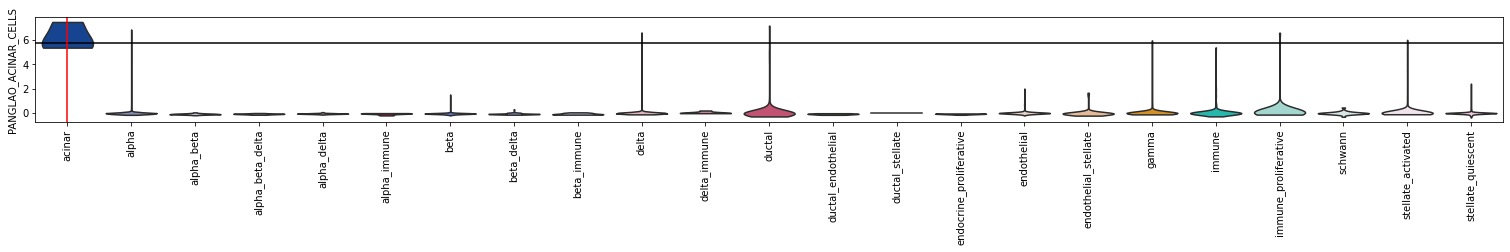

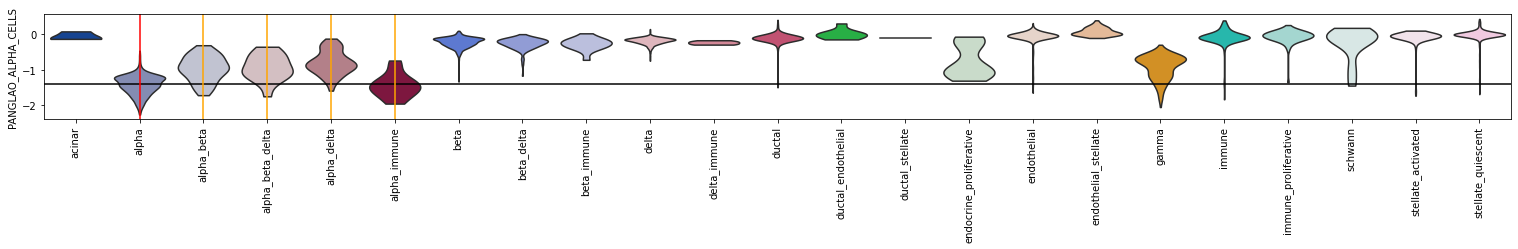

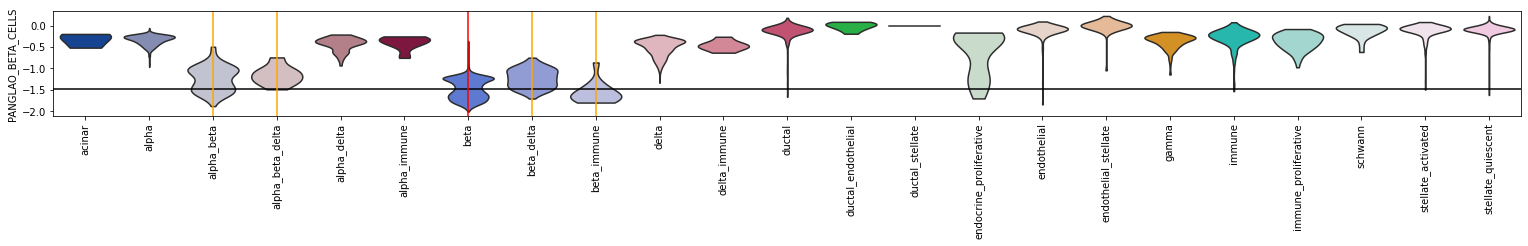

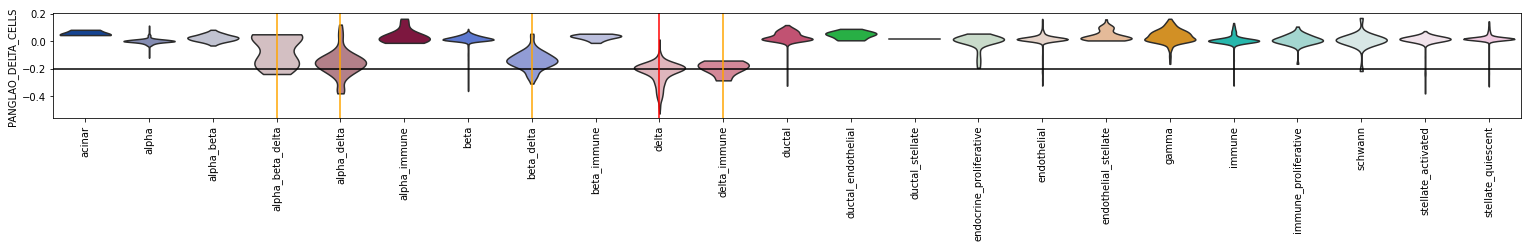

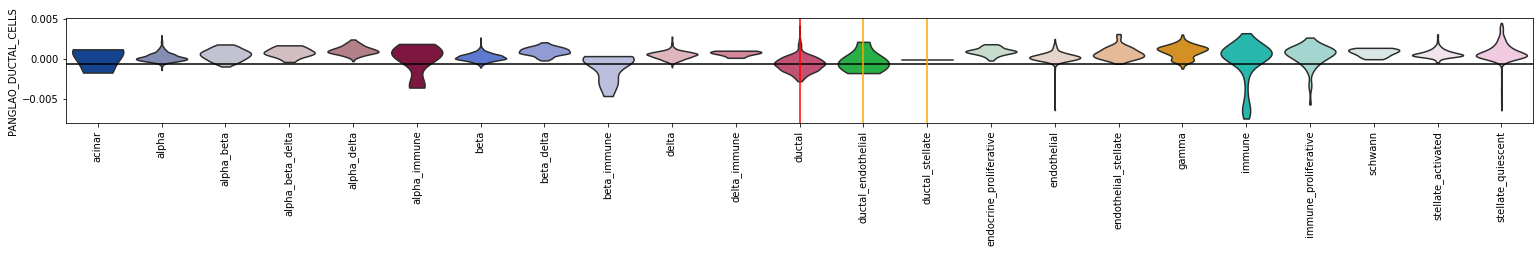

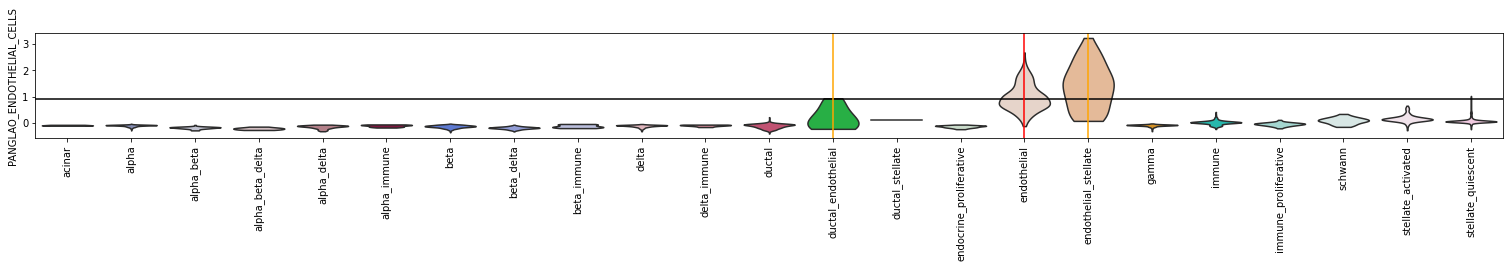

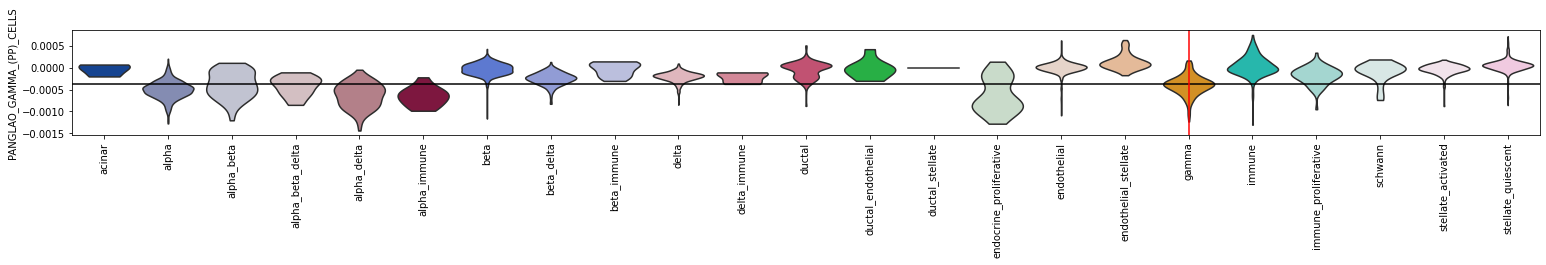

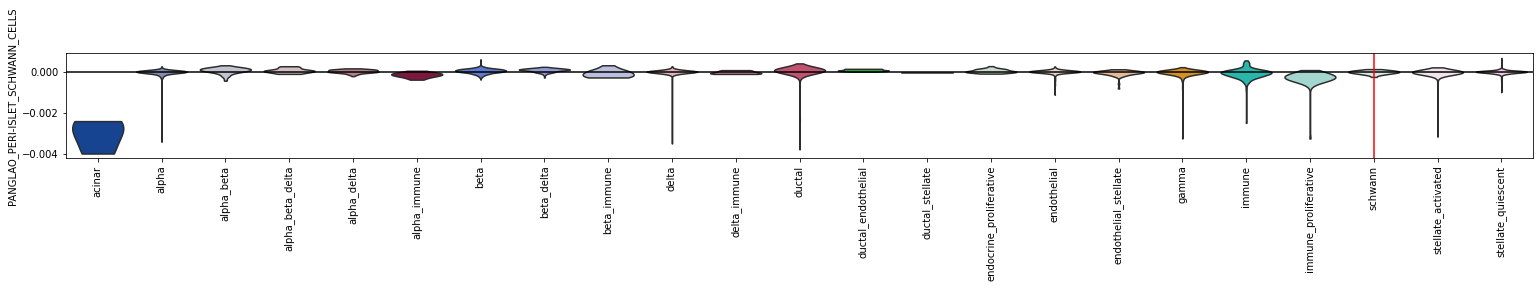

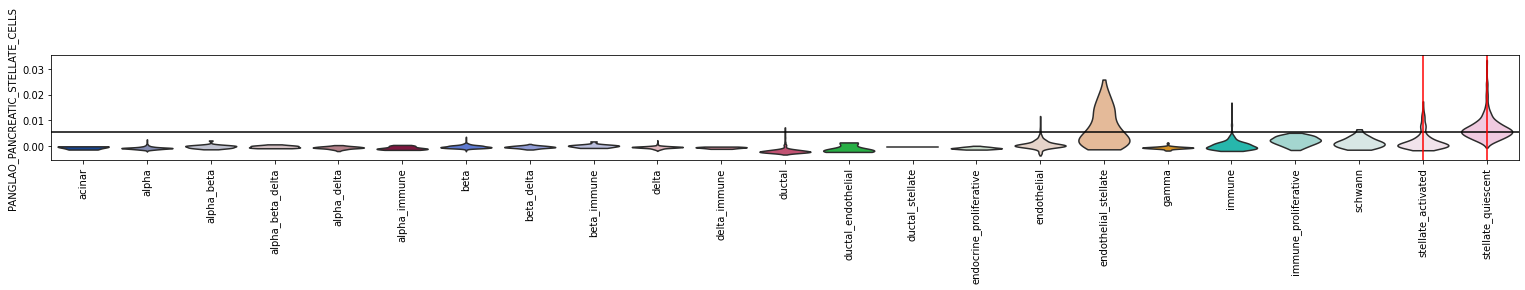

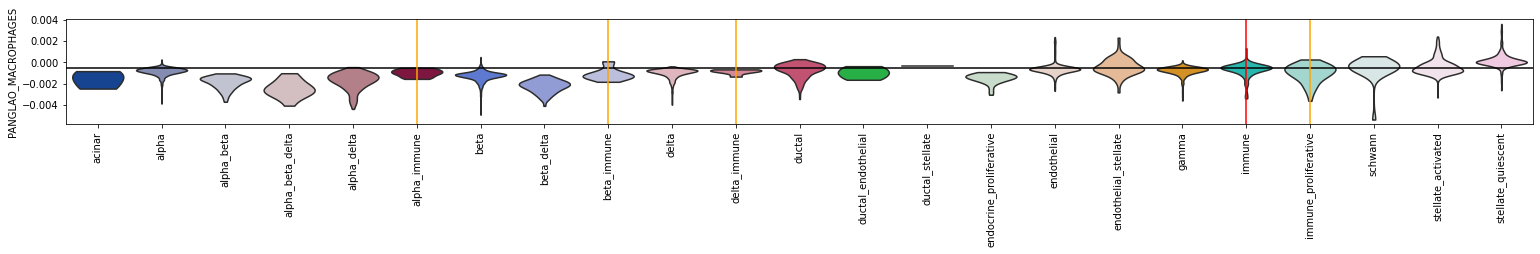

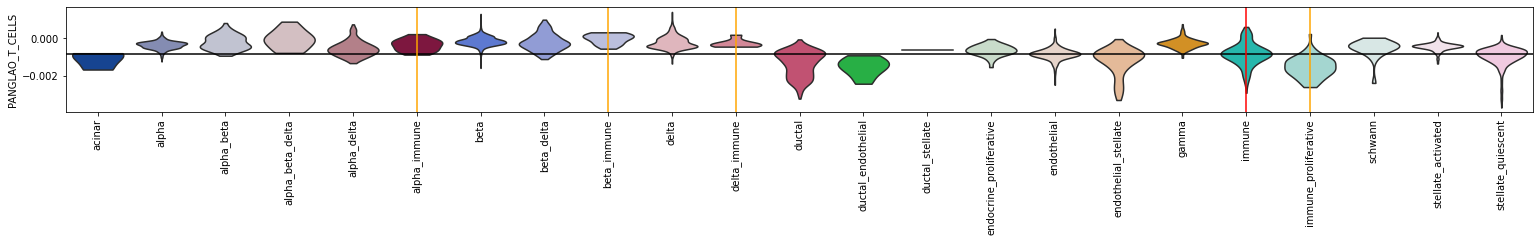

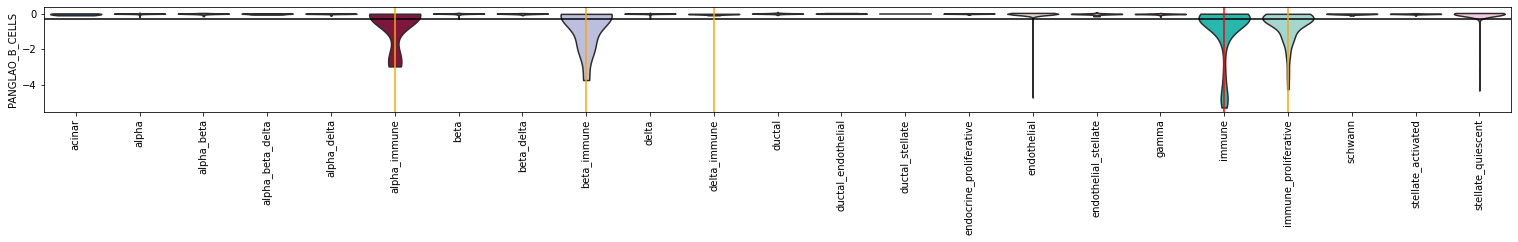

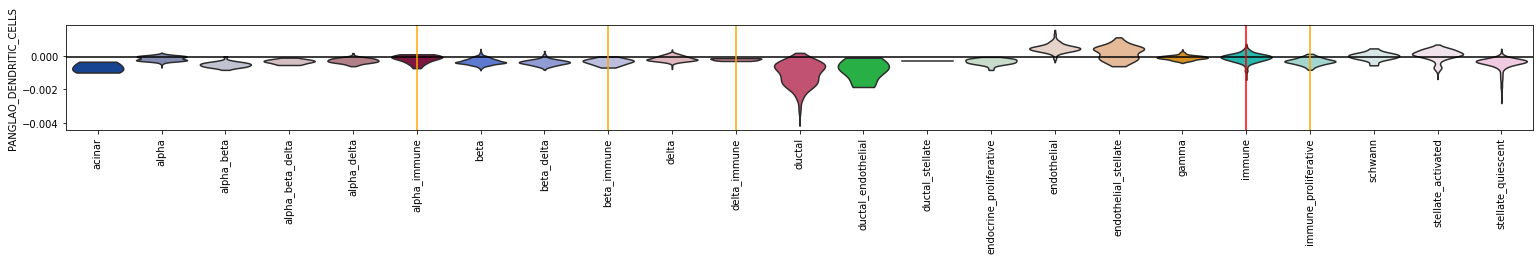

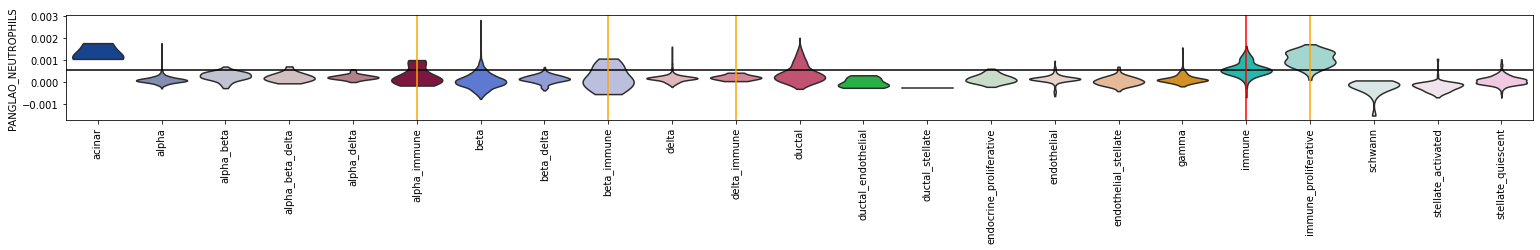

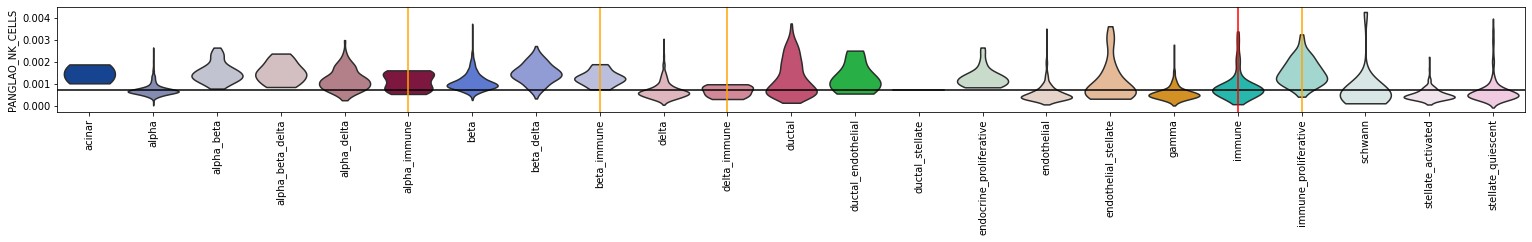

In [156]:
terms_ct={'PANGLAO_ACINAR_CELLS':['acinar'],
          'PANGLAO_ALPHA_CELLS':['alpha'],
          'PANGLAO_BETA_CELLS':['beta'],
            'PANGLAO_DELTA_CELLS':['delta'],
          'PANGLAO_DUCTAL_CELLS':['ductal'],
          'PANGLAO_ENDOTHELIAL_CELLS':['endothelial'],
            'PANGLAO_GAMMA_(PP)_CELLS':['gamma'],
          'PANGLAO_PERI-ISLET_SCHWANN_CELLS':['schwann'],
            'PANGLAO_PANCREATIC_STELLATE_CELLS':['stellate_activated', 'stellate_quiescent'],
             # Different immune types
             'PANGLAO_MACROPHAGES':['immune'],
          'PANGLAO_T_CELLS':['immune'],
          'PANGLAO_B_CELLS':['immune'],
             'PANGLAO_DENDRITIC_CELLS':['immune'],
          "PANGLAO_NEUTROPHILS":['immune'],
          "PANGLAO_NK_CELLS":['immune']}
for term, cts in terms_ct.items():
    adata.obs[term]=adata.obsm['X_integrated'][:,np.argwhere(adata.uns['terms']==term)[0][0]]                                      
    p=sc.pl.violin(adata, keys=term, groupby='cell_type',stripplot=False,rotation=90,show=False)
    # mark ct median
    ct_median=adata.obs.query('cell_type in @cts')[term].median()    
    p.axhline(ct_median,c='k')
    # Mark ct
    ct_idxs=[np.argwhere(adata.obs.cell_type.cat.categories.values==cti)[0,0] for cti in cts]
    for ct_idx in ct_idxs:
        p.axvline(ct_idx,c='r')
    # Mark related cell types
    related_cts=[ct for ct in adata.obs.cell_type.unique()
                if any([c in ct for c in cts]) and ct not in cts]
    ct_idxs=[np.argwhere(adata.obs.cell_type.cat.categories.values==cti)[0,0] 
             for cti in related_cts]
    for ct_idx in ct_idxs:
        p.axvline(ct_idx,c='orange')
    adata.obs.drop(term,axis=1,inplace=True)

## Beta cell function

In [157]:
# healthy vs diseased

# Subset to active reactome z-s of healthy beta cells
terms_use=adata.uns['terms_is_active'] & \
    np.array([t.startswith('REACTOME') for t in adata.uns['terms']])
z1=adata.obsm['X_integrated'][
    (adata.obs.study_sample=='STZ_G1').values &\
    (adata.obs.cell_type=='beta').values,:][:, terms_use]
# Subset to active reactome z-s of diseased sample beta cells
z2=adata.obsm['X_integrated'][
    (adata.obs.study_sample=='STZ_G2').values &\
    (adata.obs.cell_type=='beta').values,:][:,terms_use]
# DE test
data=de_mannwhitneyu(z1=z1,z2=z2,terms=adata.uns['terms'][terms_use])

In [158]:
data.sort_values('padj').iloc[:50]

,term,pval,padj
298,REACTOME_PROTEIN_FOLDING,1.707089e-39,7.783143e-37
90,REACTOME_SIGNALING_BY_HIPPO,2.344320e-39,7.783143e-37
484,REACTOME_NITRIC_OXIDE_STIMULATES_GUANYLATE_CYC...,9.110231e-39,2.016398e-36
1,REACTOME_TRANSLATION,1.934385e-38,3.211078e-36
576,REACTOME_RNA_POL_III_TRANSCRIPTION_TERMINATION,5.012307e-38,6.656343e-36
229,REACTOME_PHASE1_FUNCTIONALIZATION_OF_COMPOUNDS,2.287998e-37,2.532051e-35
245,REACTOME_METABOLISM_OF_POLYAMINES,4.644102e-37,4.405263e-35
525,REACTOME_GABA_RECEPTOR_ACTIVATION,6.095969e-36,5.059655e-34
531,REACTOME_NFKB_AND_MAP_KINASES_ACTIVATION_MEDIA...,7.531246e-36,5.556386e-34
272,REACTOME_G_PROTEIN_ACTIVATION,8.626442e-36,5.727958e-34
